# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data preprocessing and feature engineering by 
    - Identifying the implicit missing values of attributes and replacing them with an explicit missing value using [Pandas](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).
    - removing explicit missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [1]:
import pandas as pd
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics
from sklearn.compose import ColumnTransformer 

In [2]:
df = pd.read_csv('/Users/pahomovskij/PycharmProjects/ml-gisma/datasets/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df shape", df.shape)
print("df_train size", df_train.shape)
print("df_test size", df_test.shape)

df shape (32561, 15)
df_train size (24420, 15)
df_test size (8141, 15)


In [4]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: >

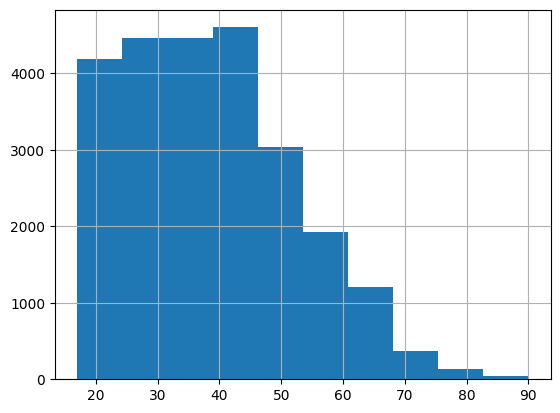

In [30]:
df_train['age'].hist()

<Axes: xlabel='workclass'>

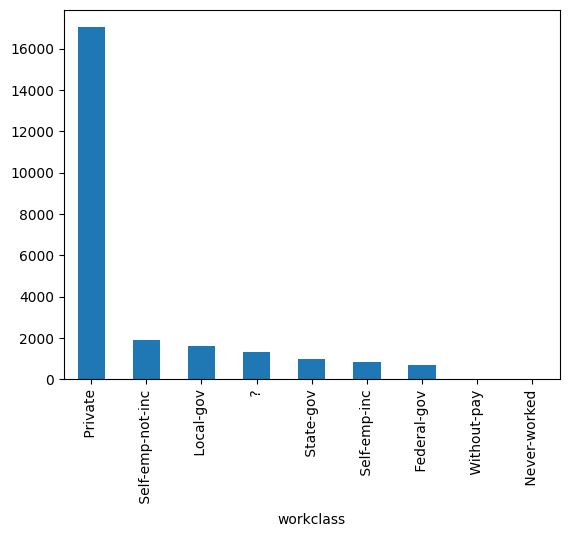

In [31]:
df_train['workclass'].value_counts().plot(kind='bar')

<Axes: xlabel='target'>

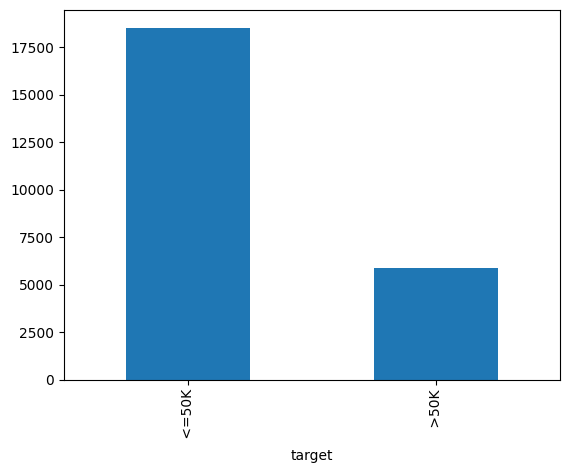

In [32]:
df_train['target'].value_counts().plot(kind='bar')

## Data Preprocessing

- what should we do with the data error that we have
- removing rows with quetion mark?
- keep quetion marks, do nothing to clean the data
Alternatives:
- removing rows with the quetionn marks?
- replace question marks with something else?

In [33]:
x_train = df_train.drop("target", axis=1)
y_train = df_train['target']
x_test = df_test.drop("target", axis=1)
y_test = df_test['target']

print("x_train size", x_train.shape)
print("y_train size", y_train.shape)

print("x_test size", x_test.shape)
print("y_test size", y_test.shape)

x_train size (24420, 14)
y_train size (24420,)
x_test size (8141, 14)
y_test size (8141,)


## Feature Engineering

In [34]:
numerical_attributes = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attributes = x_train.select_dtypes(include=['object']).columns
# print("Numerical attributes:", numerical_attributes)
# print("Categorical attributes:", categorical_attributes)
ct = ColumnTransformer([
    ("standard_scaler", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ("one_hot_encoder", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes)
])
ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print("x_train size", x_train.shape)
print("x_test size", x_test.shape)

x_train size (24420, 108)
x_test size (8141, 108)


- Check out hot apply PCA as a dimensional technique
- find a way to do oversampling to balance classes

## Model Training


In [35]:
model = sklearn.svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

## Test

In [36]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy

0.8442451787249724